In [3]:
# Dependencies
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [4]:
# Read the data
data = pd.read_csv("data/cluster_predict.csv")
data

,zipcode,AVERAGE PRICE,Income per capita,Median Age Male,Median Age Female,Bachelor's degree > 25,Public transportation,clusters
0,602,114105.2500,9277.0,41.9,42.8,0.134690,0.002796,0
1,606,59377.7500,5943.0,43.2,43.4,0.068866,0.000000,0
2,610,108219.5833,10220.0,40.4,44.2,0.130349,0.002741,0
3,617,101022.0000,9122.0,39.2,41.0,0.157224,0.005154,0
4,693,330761.5000,10536.0,39.2,41.9,0.148064,0.006750,0
...,...,...,...,...,...,...,...,...
29423,99827,211487.0000,33387.0,45.2,45.8,0.229525,0.002308,0
29424,99833,254642.9167,33227.0,39.3,42.7,0.219672,0.009211,0
29425,99835,402391.3333,38423.0,37.2,40.5,0.204494,0.010178,0
29426,99901,294448.8333,34886.0,39.4,39.9,0.170142,0.035648,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29428 entries, 0 to 29427
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   zipcode                 29428 non-null  int64  
 1   AVERAGE  PRICE          29428 non-null  float64
 2   Income per capita       29428 non-null  float64
 3   Median Age Male         29428 non-null  float64
 4   Median Age Female       29428 non-null  float64
 5   Bachelor's degree > 25  29428 non-null  float64
 6   Public transportation   29428 non-null  float64
 7   clusters                29428 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 1.8 MB


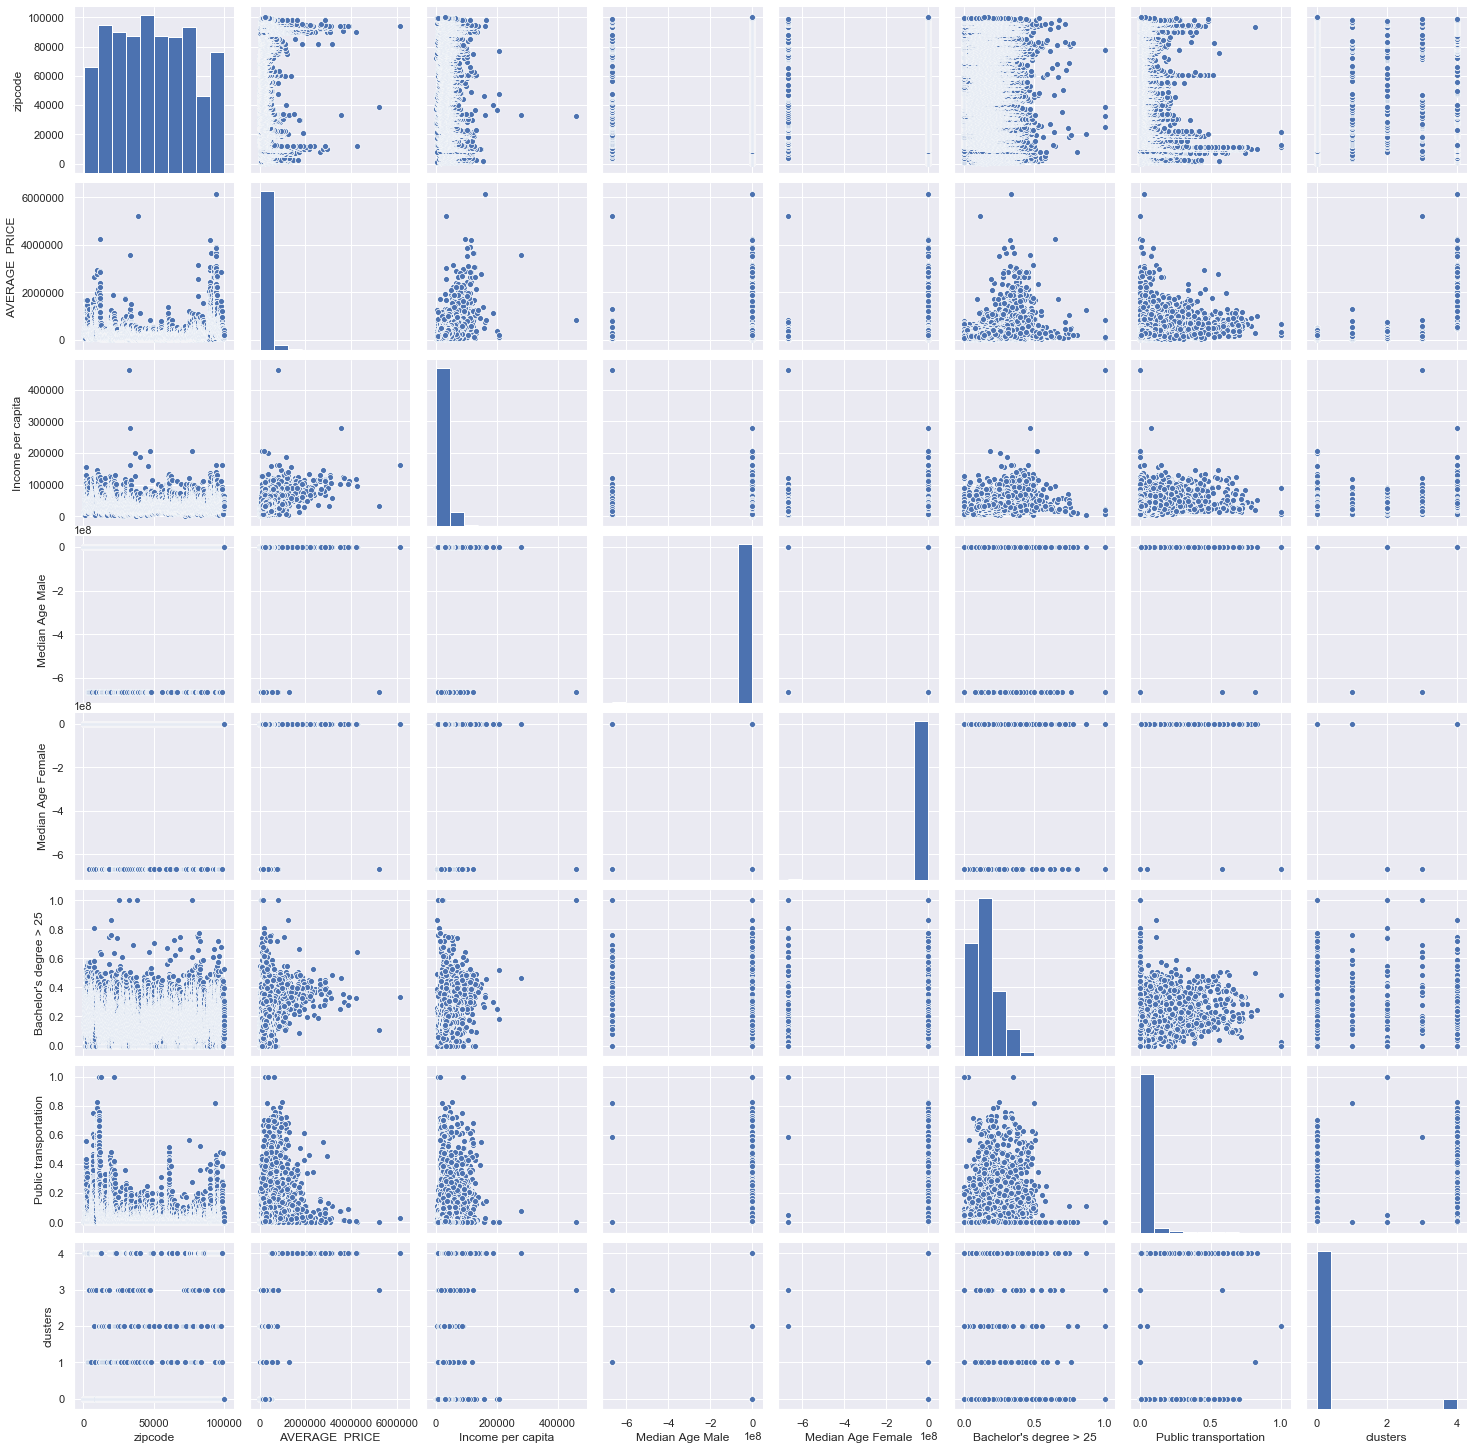

In [7]:
sns.pairplot(data)

In [9]:
# Define variables
x = data[['Income per capita', 'Median Age Male', 'Median Age Female',

       "Bachelor's degree > 25", 'Public transportation']]

In [22]:
# Define prediction variable
y = data['clusters']

In [23]:
# Split test and training data sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,random_state=1)

In [24]:
# Build model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
# Fit model using training data
classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
# Validate the model using the test data
print(f"Training Data Score: {classifier.score(x_train, y_train)}")
print(f"Testing Data Score: {classifier.score(x_test, y_test)}")

Training Data Score: 0.9500946647895528
Testing Data Score: 0.9472193906444671


In [27]:
predictions = classifier.predict(x_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
11779,0,0
2774,0,0
2182,4,4
8846,0,0
28642,0,0
...,...,...
3197,0,0
6950,0,0
18049,0,0
14677,0,0
